In [1]:
# Compare 2D variables from two Model simulations and INCITE runs
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import matplotlib.tri as tri
import sys
sys.setrecursionlimit(9000)

In [2]:
# Change this part
Year  = 2008
Month = 10
Day   = 1
Hour  = 0
ngridx = 720
ngridy = 360
HisFlag = 'h2' # This output is for daily average
# Walter's INCITE runs
INCITE_Case = 'NXY_32x1.DX_1600.L_125_115.DT_2e0'
INCITE_Case2 = 'NXY_32x1.DX_200.L_125_115.DT_5e-1'
Date  = str(Year)+'-'+str("{0:0=2d}".format(Month))+'-'+str("{0:0=2d}".format(Day))+'-'+str("{0:0=5d}".format(Hour))
Date3 = str(Year)+'-'+str("{0:0=2d}".format(Month))+'-'+str("{0:0=2d}".format(Day))

In [3]:
# Model output path and filename
PATH = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
FNAME = 'Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.'+HisFlag+'.'+Date+'.nc'
PATH2 = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
FNAME2 = 'Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera.cam.'+HisFlag+'.'+Date+'.nc'
# Walter's INCITE runs
PATH3 = '/scratch1/07088/tg863871/INCITE2020/INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01/'
FNAME3 = 'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case+'.2008-10-01.eam.h1.'+Date3+'-00000.remap_180x360.nc'
PATH4 = '/scratch1/07088/tg863871/INCITE2020/INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01/'
FNAME4 = 'INCITE2020.HC.GNUGPU.ne45pg2_r05_oECv3.F-MMFXX.'+INCITE_Case2+'.2008-10-01.eam.h1.'+Date3+'-00000.remap_180x360.nc'

In [4]:
# Read data
FILE = nc.Dataset(PATH+FNAME, mode = 'r')
FILE2 = nc.Dataset(PATH2+FNAME2, mode = 'r')
FILE3 = nc.Dataset(PATH3+FNAME3, mode = 'r')
FILE4 = nc.Dataset(PATH4+FNAME4, mode = 'r')

In [5]:
# Read coordinates
lon = FILE.variables['lon']
lat = FILE.variables['lat']
lon3 = FILE3.variables['lon']
lat3 = FILE3.variables['lat']
lat3.shape

(180,)

In [6]:
# Read 2D variables
CLOW   = FILE.variables['CLDLOW']
CMED  = FILE.variables['CLDMED']
CTOT  = FILE.variables['CLDTOT']
LHFLX = FILE.variables['LHFLX']
CLOW2   = FILE2.variables['CLDLOW']
CMED2  = FILE2.variables['CLDMED']
CTOT2  = FILE2.variables['CLDTOT']
LHFLX2 = FILE2.variables['LHFLX']
LHFLX3 = FILE3.variables['LHFLX']
LHFLX_daily_mean3 = np.mean(LHFLX3, axis=0)
LHFLX4 = FILE4.variables['LHFLX']
LHFLX_daily_mean4 = np.mean(LHFLX4, axis=0)
LHFLX_daily_mean4.shape

(180, 360)

In [7]:
# Interpolate Model results to INCITE grid
xi = lon3[:]
yi = lat3[:]
Xi, Yi = np.meshgrid(lon3, lat3)
# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(lon[:], lat[:])
interpolator = tri.LinearTriInterpolator(triang, CLOW[1,:])
CLOWi = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, CLOW2[1,:])
CLOW2i = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, CMED[1,:])
CMEDi = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, CTOT[1,:])
CTOTi = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, LHFLX[1,:])
LHFLXi = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, CLOW2[1,:])
CLOW2i = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, CMED2[1,:])
CMED2i = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, CTOT2[1,:])
CTOT2i = interpolator(Xi, Yi)
interpolator = tri.LinearTriInterpolator(triang, LHFLX2[1,:])
LHFLX2i = interpolator(Xi, Yi)

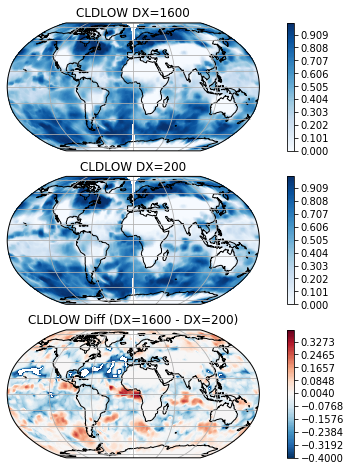

In [8]:
# Compare the low cloud fraction
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(3,1,1, projection=ccrs.Robinson())
levels = np.linspace(0, 1, 100)
levels2 = np.linspace(-0.4, 0.4, 100)
#-- choose map projection
ax1.set_global()
#-- add coastlines, country border lines, and grid lines
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, CLOWi, levels=levels, cmap="Blues",transform=ccrs.PlateCarree())
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('CLDLOW DX=1600')
ax2 = fig.add_subplot(3,1,2, projection=ccrs.Robinson())
ax2.set_global()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, CLOW2i, levels=levels, cmap="Blues",transform=ccrs.PlateCarree())
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('CLDLOW DX=200')
ax3 = fig.add_subplot(3,1,3, projection=ccrs.Robinson())
ax3.set_global()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
ax3.gridlines()
cntr3=ax3.contourf(xi, yi, CLOW2i-CLOWi, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr3, ax=ax3)
ax3.set_title('CLDLOW Diff (DX=1600 - DX=200)')
plt.show()

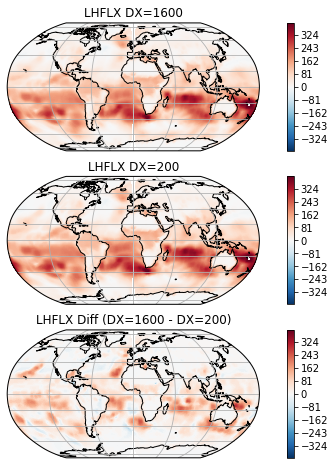

In [9]:
# Compare the surface latent heat flux <Model>
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(3,1,1, projection=ccrs.Robinson())
levels = np.linspace(-400, 400, 801)
levels2 = np.linspace(-50, 50, 101)
#-- choose map projection
ax1.set_global()
#-- add coastlines, country border lines, and grid lines
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, LHFLXi, levels=levels, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('LHFLX DX=1600')
ax2 = fig.add_subplot(3,1,2, projection=ccrs.Robinson())
ax2.set_global()
ax2.gridlines()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
cntr2=ax2.contourf(xi, yi, LHFLX2i, levels=levels, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('LHFLX DX=200')
ax3 = fig.add_subplot(3,1,3, projection=ccrs.Robinson())
ax3.set_global()
ax3.gridlines()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
cntr3=ax3.contourf(xi, yi, LHFLX2i-LHFLXi, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr2, ax=ax3)
ax3.set_title('LHFLX Diff (DX=1600 - DX=200)')
plt.show()

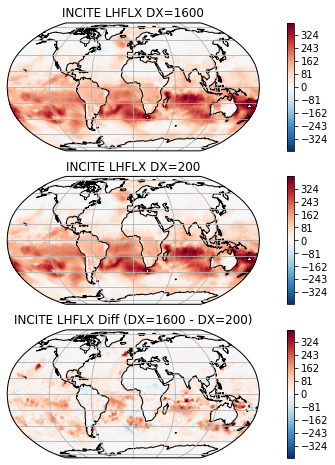

In [10]:
# Compare the surface latent heat flux <INCITE>
#-- create figure and axes object
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(3,1,1, projection=ccrs.Robinson())
levels = np.linspace(-400, 400, 801)
levels2 = np.linspace(-50, 50, 101)
#-- choose map projection
ax1.set_global()
#-- add coastlines, country border lines, and grid lines
ax1.coastlines()
ax1.gridlines()
cntr1=ax1.contourf(xi, yi, LHFLX_daily_mean3, levels=levels, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr1, ax=ax1)
ax1.set_title('INCITE LHFLX DX=1600')
ax2 = fig.add_subplot(3,1,2, projection=ccrs.Robinson())
ax2.set_global()
#-- add coastlines, country border lines, and grid lines
ax2.coastlines()
ax2.gridlines()
cntr2=ax2.contourf(xi, yi, LHFLX_daily_mean4, levels=levels, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr2, ax=ax2)
ax2.set_title('INCITE LHFLX DX=200')
ax3 = fig.add_subplot(3,1,3, projection=ccrs.Robinson())
ax3.set_global()
ax3.gridlines()
#-- add coastlines, country border lines, and grid lines
ax3.coastlines()
cntr3=ax3.contourf(xi, yi, LHFLX_daily_mean4-LHFLX_daily_mean3, levels=levels2, cmap="RdBu_r",transform=ccrs.PlateCarree())
fig.colorbar(cntr2, ax=ax3)
ax3.set_title('INCITE LHFLX Diff (DX=1600 - DX=200)')
plt.show()

In [26]:
x = np.random.uniform(-2, 2, 200)
y = np.random.uniform(-2, 2, 200)
triang = tri.Triangulation(x, y)
x.shape

(200,)